## Latihan dengan Silinder

In [1]:
import openmc
%matplotlib inline

In [13]:
Pu = openmc.Material()
Pu.add_nuclide("Pu239", 1.0, "wo")
Pu.set_density("g/cc", 15.8)
#Pu.export_to_xml()

materials = openmc.Materials([Pu])
materials.export_to_xml()
!cat materials.xml

<?xml version='1.0' encoding='utf-8'?>
<materials>
  <material depletable="true" id="5">
    <density units="g/cc" value="15.8"/>
    <nuclide name="Pu239" wo="1.0"/>
  </material>
</materials>


<?xml version='1.0' encoding='UTF-8'?>
<geometry>
  <cell id="11" material="5" region="-22 -23 24" universe="8"/>
  <surface boundary="vacuum" coeffs="0.0 0.0 4.935" id="22" type="z-cylinder"/>
  <surface boundary="vacuum" coeffs="17.273" id="23" type="z-plane"/>
  <surface boundary="vacuum" coeffs="0" id="24" type="z-plane"/>
</geometry>


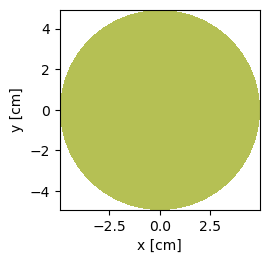

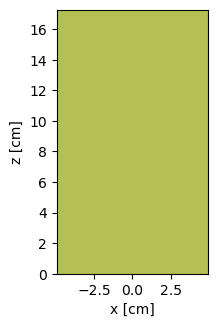

In [16]:
Pu_cylinder = openmc.ZCylinder(r=4.935, boundary_type='vacuum')
tinggi = openmc.ZPlane(z0=17.273, boundary_type='vacuum')
alas = openmc.ZPlane(z0=0, boundary_type='vacuum')

cylinder = openmc.Cell(fill=Pu, region=(-Pu_cylinder & -tinggi & +alas))
geom = openmc.Geometry([cylinder])
geom.plot(basis='xy')
geom.plot(basis='xz')
geom.export_to_xml()

!cat geometry.xml

In [17]:
# Pengaturan simulasi
settings = openmc.Settings()
settings.particles = 5000        # Jumlah neutron per generasi
#settings.keff_guess = 1.0         # Tebakan awal keff
settings.inactive = 50            # Generasi yang diabaikan
settings.batches = 250            # Total generasi

# Posisi sumber neutron
source = openmc.Source()
source.space = openmc.stats.Point((0, 0, 8.6))  
settings.source = source

settings.export_to_xml()

# Run
openmc.run()

/home/dhiyasalmas/miniconda3/envs/openmc-env/lib/python3.11/site-packages/openmc/source.py:656: FutureWarning: This class is deprecated in favor of 'IndependentSource'
  warnings.warn("This class is deprecated in favor of 'IndependentSource'", FutureWarning)


                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################